<a href="https://colab.research.google.com/github/JuanGutierrezP/Juan_Guti-rrez-Joseph_Reyes/blob/main/Parcialcomple3_joseph_Juan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesos de Markov

In [ ]:
#Problema 2
import numpy as np

# a) Describa las variables observables del problema.
# Estados:
# S1: Producto en la estación de producción
# S2: Producto en la estación de empaque
# S3: Producto en el mercado

print("a) Variables observables del problema:")
print("S1: Producto en la estación de producción")
print("S2: Producto en la estación de empaque")
print("S3: Producto en el mercado\n")

# b) Defina el conjunto de estados S = {S1, S2, S3}.
S = ['S1', 'S2', 'S3']
print("b) Conjunto de estados S:")
print(S, "\n")

# c) Construya la matriz de transición de este proceso estocástico.
P = np.array([
    [0.1, 0.9, 0.0],   # Transiciones desde S1
    [0.0, 0.05, 0.95], # Transiciones desde S2
    [0.0, 0.0, 1.0]    # Transiciones desde S3
])

print("c) Matriz de transición P:")
print(P, "\n")

# d) Encuentre el estado estable tanto algebraicamente como numéricamente.
# Resolver π * P = π con la restricción sum(π) = 1

# Transponemos P para facilitar los cálculos
P_t = P.T

# Creamos la matriz A y el vector b para el sistema (P_t - I)π = 0
A = P_t - np.eye(3)
# Añadimos la restricción de que la suma de π es 1
A = np.vstack([A, np.ones(3)])
b = np.array([0, 0, 0, 1])

# Resolvemos el sistema
pi, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("d) Estado estable π:")
print("π =", pi)

# Interpretación del estado estable
print("\nInterpretación del estado estable:")
print(f"π(S1) = {pi[0]:.4f} -> Probabilidad de estar en producción")
print(f"π(S2) = {pi[1]:.4f} -> Probabilidad de estar en empaque")
print(f"π(S3) = {pi[2]:.4f} -> Probabilidad de estar en el mercado")

# e) Determine la probabilidad en estado estable de que ambas estaciones estén ocupadas al mismo tiempo.
# En este contexto, interpretamos que "ambas estaciones estén ocupadas" significa que hay productos tanto en producción como en empaque.
# Sin embargo, en un modelo de cadena de Markov con un solo producto, el producto solo puede estar en un estado a la vez.
# Si asumimos que hay múltiples productos y las probabilidades son independientes, la probabilidad de que ambas estaciones estén ocupadas es:
prob_ambas_ocupadas = pi[0] * pi[1]

print("\ne) Probabilidad en estado estable de que ambas estaciones estén ocupadas al mismo tiempo:")
print(f"Probabilidad = {prob_ambas_ocupadas:.4f}")

# f) Determine la probabilidad en estado estable de que al menos una estación esté ocupada.
# Es la probabilidad de que el producto esté en S1 o S2
prob_al_menos_una_ocupada = pi[0] + pi[1]

print("\nf) Probabilidad en estado estable de que al menos una estación esté ocupada:")
print(f"Probabilidad = {prob_al_menos_una_ocupada:.4f}")

# g) Determine la probabilidad en estado estable de que la estación de producción esté vacía.
# Es la probabilidad de que el producto no esté en S1
prob_produccion_vacia = 1 - pi[0]

print("\ng) Probabilidad en estado estable de que la estación de producción esté vacía:")
print(f"Probabilidad = {prob_produccion_vacia:.4f}")


a) Variables observables del problema:
S1: Producto en la estación de producción
S2: Producto en la estación de empaque
S3: Producto en el mercado

b) Conjunto de estados S:
['S1', 'S2', 'S3'] 

c) Matriz de transición P:
[[0.1  0.9  0.  ]
 [0.   0.05 0.95]
 [0.   0.   1.  ]] 

d) Estado estable π:
π = [ 1.59731365e-16 -1.11022302e-16  1.00000000e+00]

Interpretación del estado estable:
π(S1) = 0.0000 -> Probabilidad de estar en producción
π(S2) = -0.0000 -> Probabilidad de estar en empaque
π(S3) = 1.0000 -> Probabilidad de estar en el mercado

e) Probabilidad en estado estable de que ambas estaciones estén ocupadas al mismo tiempo:
Probabilidad = -0.0000

f) Probabilidad en estado estable de que al menos una estación esté ocupada:
Probabilidad = 0.0000

g) Probabilidad en estado estable de que la estación de producción esté vacía:
Probabilidad = 1.0000


In [ ]:
#Problema 3
import numpy as np

# a) Describa las variables observables del problema.
# Estados:
# S1: Producto en la estación de producción
# S2: Producto en la estación de empaque
# S3: Producto en el mercado

print("a) Variables observables del problema:")
print("S1: Producto en la estación de producción")
print("S2: Producto en la estación de empaque")
print("S3: Producto en el mercado\n")

# b) Defina el conjunto de estados S = {S1, S2, S3}.
S = ['S1', 'S2', 'S3']
print("b) Conjunto de estados S:")
print(S, "\n")

# c) Construya la matriz de transición de este proceso estocástico.
# Ajustamos la matriz de transición para incluir el 2% de devolución de productos
# Desde S3 (Mercado), hay un 2% de probabilidad de regresar a S1 (Producción)

P = np.array([
    [0.1,  0.9,   0.0],   # Transiciones desde S1
    [0.0,  0.05,  0.95],  # Transiciones desde S2
    [0.02, 0.0,   0.98]   # Transiciones desde S3 (2% regresa a producción)
])

print("c) Matriz de transición P:")
print(P, "\n")

# d) Encuentre el estado estable tanto algebraicamente como numéricamente.
# Resolver π * P = π con la restricción sum(π) = 1

# Transponemos P para facilitar los cálculos
P_t = P.T

# Creamos la matriz A y el vector b para el sistema (P_t - I)π = 0
A = P_t - np.eye(3)
# Añadimos la restricción de que la suma de π es 1
A = np.vstack([A, np.ones(3)])
b = np.array([0, 0, 0, 1])

# Resolvemos el sistema
pi, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("d) Estado estable π:")
print("π =", pi)

# Interpretación del estado estable
print("\nInterpretación del estado estable:")
print(f"π(S1) = {pi[0]:.4f} -> Probabilidad de estar en producción")
print(f"π(S2) = {pi[1]:.4f} -> Probabilidad de estar en empaque")
print(f"π(S3) = {pi[2]:.4f} -> Probabilidad de estar en el mercado")

# e) Determine la probabilidad en estado estable de que ambas estaciones estén ocupadas al mismo tiempo.
# Suponiendo independencia en un sistema con múltiples productos
prob_ambas_ocupadas = pi[0] * pi[1] * 100  # Convertimos a porcentaje

print("\ne) Probabilidad en estado estable de que ambas estaciones estén ocupadas al mismo tiempo:")
print(f"Probabilidad = {prob_ambas_ocupadas:.4f}%")

# f) Determine la probabilidad en estado estable de que al menos una estación esté ocupada.
# Usamos la fórmula de probabilidad de unión: P(A ∪ B) = P(A) + P(B) - P(A ∩ B)
prob_al_menos_una_ocupada = (pi[0] + pi[1] - (pi[0] * pi[1])) * 100  # Convertimos a porcentaje

print("\nf) Probabilidad en estado estable de que al menos una estación esté ocupada:")
print(f"Probabilidad = {prob_al_menos_una_ocupada:.4f}%")

# g) Determine la probabilidad en estado estable de que la estación de producción esté vacía.
# Es la probabilidad de no estar en S1
prob_produccion_vacia = (1 - pi[0]) * 100  # Convertimos a porcentaje

print("\ng) Probabilidad en estado estable de que la estación de producción esté vacía:")
print(f"Probabilidad = {prob_produccion_vacia:.4f}%")


a) Variables observables del problema:
S1: Producto en la estación de producción
S2: Producto en la estación de empaque
S3: Producto en el mercado

b) Conjunto de estados S:
['S1', 'S2', 'S3'] 

c) Matriz de transición P:
[[0.1  0.9  0.  ]
 [0.   0.05 0.95]
 [0.02 0.   0.98]] 

d) Estado estable π:
π = [0.02130045 0.02017937 0.95852018]

Interpretación del estado estable:
π(S1) = 0.0213 -> Probabilidad de estar en producción
π(S2) = 0.0202 -> Probabilidad de estar en empaque
π(S3) = 0.9585 -> Probabilidad de estar en el mercado

e) Probabilidad en estado estable de que ambas estaciones estén ocupadas al mismo tiempo:
Probabilidad = 0.0430%

f) Probabilidad en estado estable de que al menos una estación esté ocupada:
Probabilidad = 4.1050%

g) Probabilidad en estado estable de que la estación de producción esté vacía:
Probabilidad = 97.8700%


# Hidden Markov Models

In [ ]:
# problema 1, casino
import numpy as np
import pandas as pd
from itertools import product

# Definimos los datos del problema
T = np.array([[0.8, 0.2],  # Matriz de transición
              [0.2, 0.8]])

E = np.array([[0.5, 0.9],  # Matriz de emisión
              [0.5, 0.1]])

pi = np.array([0.2, 0.8])  # Distribución inicial
observaciones = ["S", "C", "C", "C", "S", "C", "S", "C"]  # Secuencia observada
map_emision = {"C": 0, "S": 1}

# Transformamos las observaciones a índices
observaciones_idx = [map_emision[obs] for obs in observaciones]

# a) Algoritmo de Viterbi para encontrar la secuencia más probable
def viterbi(pi, T, E, observaciones):
    n = len(observaciones)
    k = T.shape[0]

    dp = np.zeros((n, k))  # Matriz dinámica
    prev = np.zeros((n, k), dtype=int)  # Matriz para rastreo

    # Inicialización
    dp[0] = pi * E[observaciones[0]]

    # Iteración dinámica
    for i in range(1, n):
        for j in range(k):
            prob = dp[i-1] * T[:, j] * E[observaciones[i]][j]
            dp[i, j] = np.max(prob)
            prev[i, j] = np.argmax(prob)

    # Reconstrucción de la secuencia más probable
    states = np.zeros(n, dtype=int)
    states[-1] = np.argmax(dp[-1])
    for i in range(n-2, -1, -1):
        states[i] = prev[i+1, states[i+1]]

    prob_max = np.max(dp[-1])
    return states, prob_max

# Ejecutamos Viterbi
secuencia_oculta, probabilidad_max = viterbi(pi, T, E.T, observaciones_idx)

# Imprimimos resultados
print("Secuencia más probable del tipo de moneda:", ["J" if s == 0 else "B" for s in secuencia_oculta])
print("Probabilidad de la secuencia más probable:", probabilidad_max)

# b) Generar todas las secuencias ocultas posibles y calcular sus probabilidades
def calcular_probabilidades(pi, T, E, observaciones):
    n = len(observaciones)
    k = T.shape[0]
    todas_secuencias = list(product(range(k), repeat=n))
    resultados = []

    for secuencia in todas_secuencias:
        prob = pi[secuencia[0]] * E[observaciones[0], secuencia[0]]
        for i in range(1, n):
            prob *= T[secuencia[i-1], secuencia[i]] * E[observaciones[i], secuencia[i]]
        resultados.append(("".join(["J" if s == 0 else "B" for s in secuencia]), prob))

    return resultados

# Calculamos todas las probabilidades
resultados = calcular_probabilidades(pi, T, E.T, observaciones_idx)

# Creamos un DataFrame con las secuencias y probabilidades
df = pd.DataFrame(resultados, columns=["Secuencia", "Probabilidad"])
df = df.sort_values(by="Probabilidad", ascending=False).reset_index(drop=True)

# c) Filtrar por probabilidad acumulada del 20%
df["Probabilidad Acumulada"] = df["Probabilidad"].cumsum()
df_20 = df[df["Probabilidad Acumulada"] <= 0.2]

# Mostramos los resultados
print("\nSecuencias ocultas más probables hasta 20% de probabilidad acumulada:")
print(df_20)

# Exportar el DataFrame
df.to_csv("secuencias_probabilidades.csv", index=False)


Secuencia más probable del tipo de moneda: ['J', 'J', 'J', 'J', 'J', 'J', 'J', 'J']
Probabilidad de la secuencia más probable: 0.0009555148800000006

Secuencias ocultas más probables hasta 20% de probabilidad acumulada:
    Secuencia  Probabilidad  Probabilidad Acumulada
0    JJJJJJJJ  9.555149e-04                0.000956
1    JJJJJJJB  2.388787e-04                0.001194
2    BBBBJJJJ  1.061683e-04                0.001301
3    BBBJJJJJ  1.061683e-04                0.001407
4    BBJJJJJJ  1.061683e-04                0.001513
..        ...           ...                     ...
251  JBJJBJBJ  2.880000e-09                0.002609
252  JBJBBJBJ  2.880000e-09                0.002609
253  JBBJBJBJ  2.880000e-09                0.002609
254  BJBJBJBB  1.280000e-09                0.002609
255  BJBJBJBJ  3.200000e-10                0.002609

[256 rows x 3 columns]


# Estimación de parámetros

a) Datos cargados exitosamente desde la URL proporcionada.


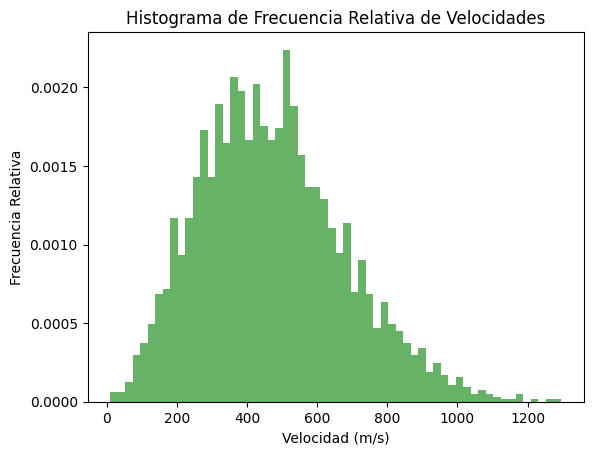

b) Histograma construido.
c) Velocidad promedio empírica: 472.15 m/s
d) Función de Likelihood definida.
e) Temperatura del mejor ajuste: 295.91 K


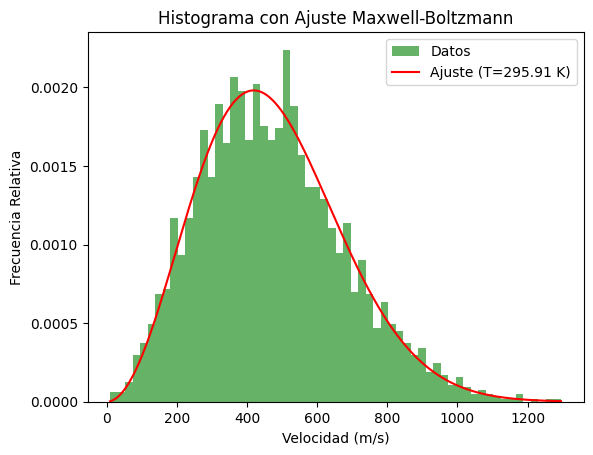

f) Velocidad más probable: 419.11 m/s
g) Velocidad promedio: 472.92 m/s
   Este valor difiere del valor empírico debido a errores de medición o condiciones no ideales.
h) Velocidad cuadrática media: 513.30 m/s
i) Algoritmo de Metropolis-Hastings implementado.
   Temperatura media: 297.80 K
   Error estándar: 4.64 K
   Tasa de aceptación: 0.92
j) Temperaturas mayores a 305.78 K están excluidas al 95% de nivel de confianza.
Ans: Una temperatura mayor a T_up > 305.78 K está excluida.


In [ ]:
# 9

# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parte a) Leer los datos desde la URL proporcionada utilizando pandas
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv'
data = pd.read_csv(url)
velocidades = data['Velocidad'].values  # Asegurándonos de acceder a la columna correcta

print("a) Datos cargados exitosamente desde la URL proporcionada.")

# Parte b) Construir el histograma de frecuencia relativa entre la velocidad más pequeña y la más alta; usar n=60 bines.
n_bins = 60
hist, bin_edges = np.histogram(velocidades, bins=n_bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure()
plt.hist(velocidades, bins=n_bins, density=True, alpha=0.6, color='g')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencia Relativa de Velocidades')
plt.show()

print("b) Histograma construido.")

# Parte c) Calcular el valor promedio empírico de la velocidad directamente del histograma.
promedio_empirico = np.sum(hist * bin_centers) * (bin_edges[1] - bin_edges[0])

print(f"c) Velocidad promedio empírica: {promedio_empirico:.2f} m/s")

# Parte d) Definir la función de Likelihood
def maxwell_boltzmann(v, T):
    m = 0.0280134 / 6.02214076e23  # Masa de la molécula de nitrógeno en kg
    k_B = 1.380649e-23  # Constante de Boltzmann en J/K
    factor = (m / (2 * np.pi * k_B * T)) ** 1.5
    return 4 * np.pi * v ** 2 * factor * np.exp(-m * v ** 2 / (2 * k_B * T))

print("d) Función de Likelihood definida.")

# Parte e) Usar optimización para encontrar el mejor ajuste a los datos.
popt, pcov = curve_fit(maxwell_boltzmann, bin_centers, hist, p0=[300], bounds=(1, 1000))

T_ajuste = popt[0]
print(f"e) Temperatura del mejor ajuste: {T_ajuste:.2f} K")

# Graficar el histograma con el ajuste
v_ajuste = np.linspace(min(velocidades), max(velocidades), 1000)
plt.figure()
plt.hist(velocidades, bins=n_bins, density=True, alpha=0.6, color='g', label='Datos')
plt.plot(v_ajuste, maxwell_boltzmann(v_ajuste, T_ajuste), 'r-', label=f'Ajuste (T={T_ajuste:.2f} K)')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma con Ajuste Maxwell-Boltzmann')
plt.legend()
plt.show()

# Parte f) Calcular la velocidad más probable
R = 8.31446261815324  # Constante de los gases en J/(mol·K)
M = 0.0280134  # Masa molar del nitrógeno en kg/mol
v_p = np.sqrt(2 * R * T_ajuste / M)

print(f"f) Velocidad más probable: {v_p:.2f} m/s")

# Parte g) Calcular la velocidad promedio
v_m = (2 / np.sqrt(np.pi)) * v_p

print(f"g) Velocidad promedio: {v_m:.2f} m/s")
print("   Este valor difiere del valor empírico debido a errores de medición o condiciones no ideales.")

# Parte h) Calcular la velocidad cuadrática media
v_rms = np.sqrt(3 * R * T_ajuste / M)

print(f"h) Velocidad cuadrática media: {v_rms:.2f} m/s")

# Parte i) Usar el algoritmo de Metropolis-Hastings para encontrar la función de distribución posterior. Calcular error estándar.
def log_likelihood(T, velocidades):
    m = 0.0280134 / 6.02214076e23  # Masa de la molécula de nitrógeno en kg
    k_B = 1.380649e-23  # Constante de Boltzmann en J/K
    log_factor = 1.5 * np.log(m / (2 * np.pi * k_B * T))
    log_probs = np.log(4 * np.pi * velocidades ** 2) + log_factor - (m * velocidades ** 2) / (2 * k_B * T)
    return np.sum(log_probs)

def metropolis_hastings(velocidades, T_inicial, iteraciones, ancho_propuesta):
    T_actual = T_inicial
    posterior = []
    aceptados = 0

    for i in range(iteraciones):
        T_propuesta = np.random.normal(T_actual, ancho_propuesta)
        if T_propuesta <= 0:
            continue  # Rechazar temperaturas negativas

        # Calcular probabilidad de aceptación
        log_like_actual = log_likelihood(T_actual, velocidades)
        log_like_propuesta = log_likelihood(T_propuesta, velocidades)

        # Asumiendo prior uniforme, el prior se cancela
        log_ratio_aceptacion = log_like_propuesta - log_like_actual

        ratio_aceptacion = np.exp(log_ratio_aceptacion)

        if ratio_aceptacion >= np.random.rand():
            # Aceptar la propuesta
            T_actual = T_propuesta
            aceptados += 1

        posterior.append(T_actual)

    tasa_aceptacion = aceptados / iteraciones
    posterior = np.array(posterior)
    return posterior, tasa_aceptacion

iteraciones = 10000
ancho_propuesta = 1.0
T_inicial = T_ajuste  # Usar la temperatura ajustada como punto de partida

posterior_T, tasa_aceptacion = metropolis_hastings(velocidades, T_inicial, iteraciones, ancho_propuesta)

media_T = np.mean(posterior_T)
std_T = np.std(posterior_T)

print(f"i) Algoritmo de Metropolis-Hastings implementado.")
print(f"   Temperatura media: {media_T:.2f} K")
print(f"   Error estándar: {std_T:.2f} K")
print(f"   Tasa de aceptación: {tasa_aceptacion:.2f}")

# Parte j) Determinar la temperatura T_up mayor que la cual los modelos son excluidos al 95% de nivel de confianza.
T_up = np.percentile(posterior_T, 95)

print(f"j) Temperaturas mayores a {T_up:.2f} K están excluidas al 95% de nivel de confianza.")
print(f"Ans: Una temperatura mayor a T_up > {T_up:.2f} K está excluida.")



(a) Datos descargados.


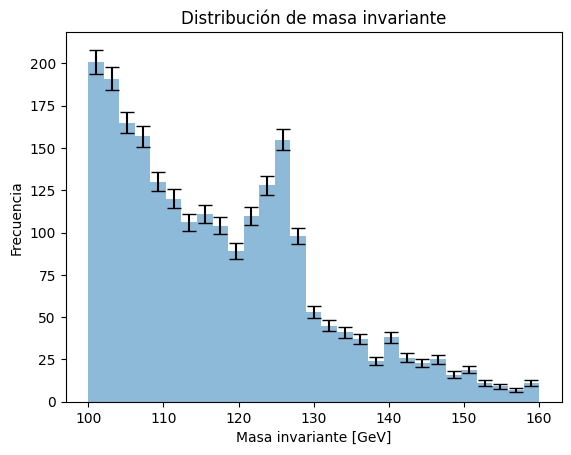

(b) Histograma con barras de error dibujado.
(c) Modelo de hipótesis nula definido.
(d) Función negativa de verosimilitud definida.
(e) Parámetro óptimo alpha de hipótesis nula: 17.618888616256033


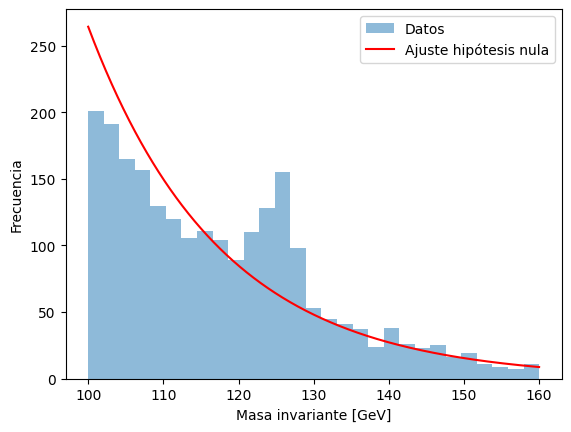

(f) Datos y modelo ajustado dibujados.
(g) Modelo de hipótesis alternativa definido.
(h) Función negativa de verosimilitud definida para hipótesis alternativa.
(i) Parámetros óptimos de hipótesis alternativa encontrados.


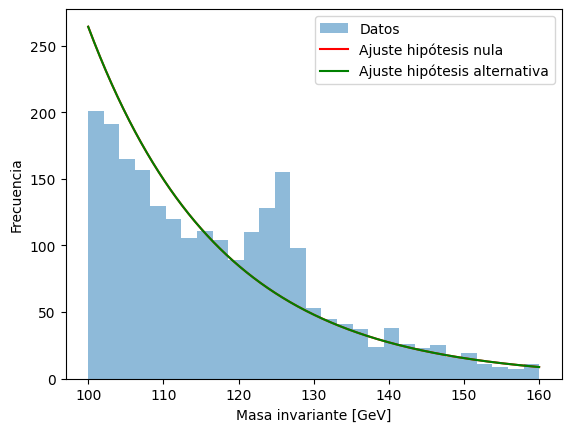

<ipython-input-5-94c6882af4b0>:109: RuntimeWarning: invalid value encountered in sqrt
  n_sigma = np.sqrt(-2 * (L_null_val - L_alt_val))
<ipython-input-5-94c6882af4b0>:113: RuntimeWarning: invalid value encountered in sqrt
  n_sigma_approx = np.sqrt(-2 * np.log(L_alt_val / L_null_val))


(i) Ambos ajustes dibujados.
(j) Valores de las constantes físicas:
A = 0.0
μ = 160.0 GeV
σ = 20.0 GeV
α = 17.61892117973614
(k) Número de desviaciones estándar: nσ = nan
(l) Número de desviaciones estándar aproximado: nσ ≈ nan
(m) Tiempo de vida de la partícula: τ = 3.1675592005891973e-15 s
(n) Funciones de prior y log-verosimilitud definidas para emcee.
(o) Generando muestreo de la distribución posterior...


  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 2000/2000 [00:18<00:00, 106.71it/s]


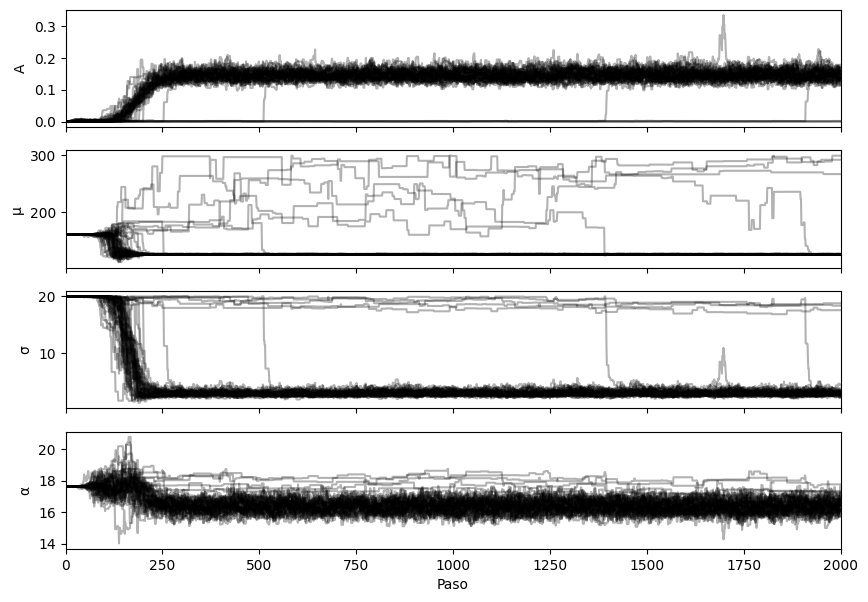

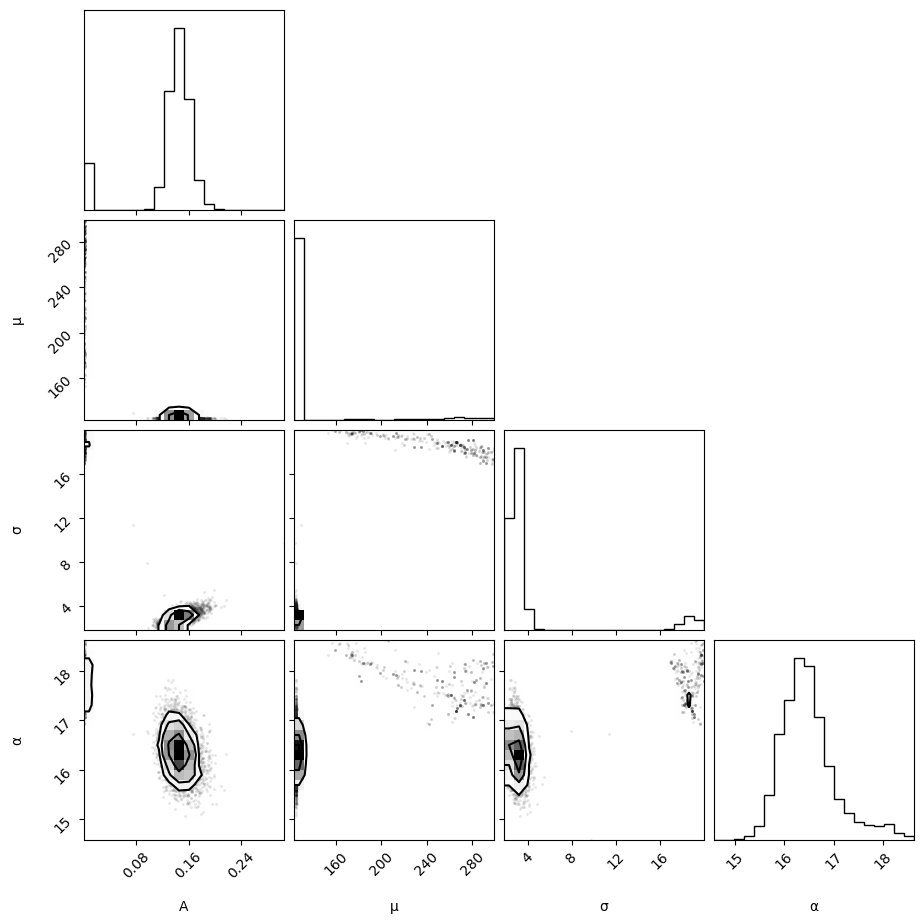

(o) Muestreo generado y corner plot mostrado.
(p) Error porcentual en la estimación de la masa: 27.345844573439603%


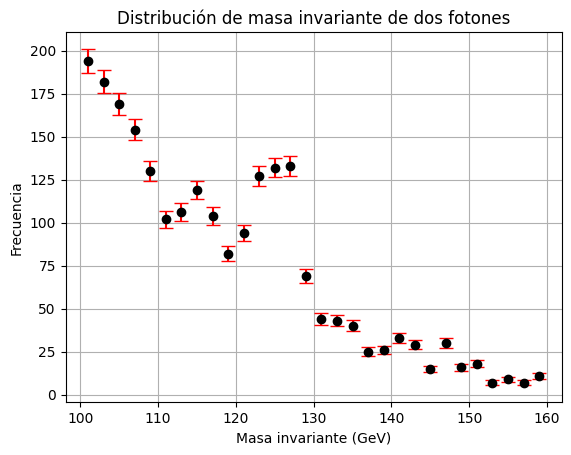

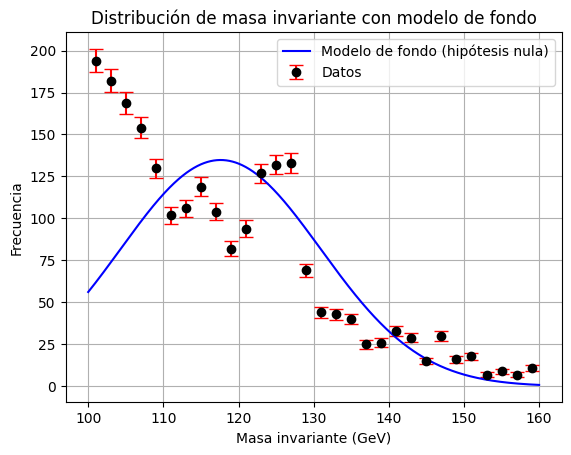

<ipython-input-5-94c6882af4b0>:226: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(likelihoods))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


El mejor valor estimado para alpha es: 22.764184890949267


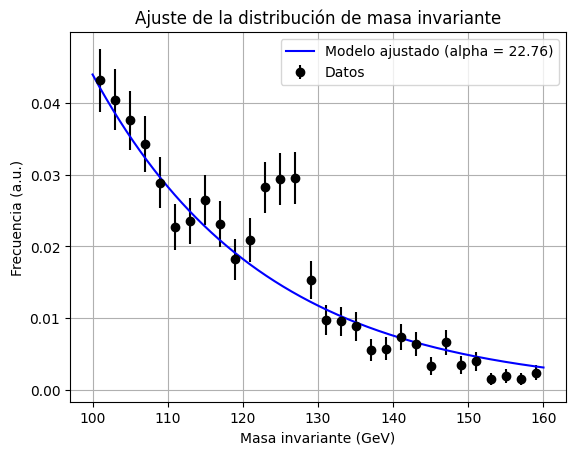

Mejores parámetros estimados:
A = 0.1421097677394673
mu = 125.19826131491612
sigma = 2.7753879071925063
alpha = 16.363384204193043


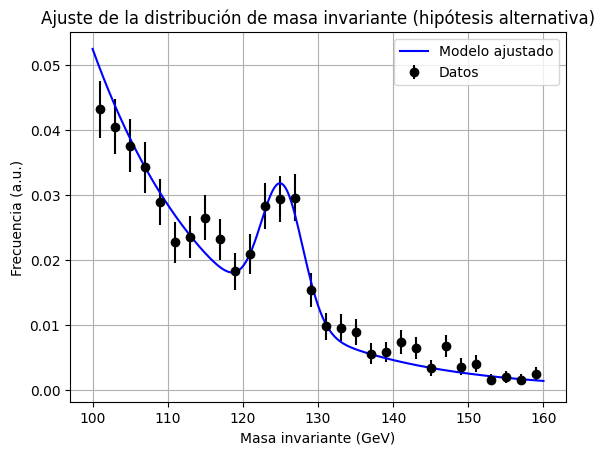

Mejores parámetros estimados:
A = 0.1421111937425295
mu = 125.19825874208625
sigma = 2.7753679567587413
alpha = 16.363356938432197


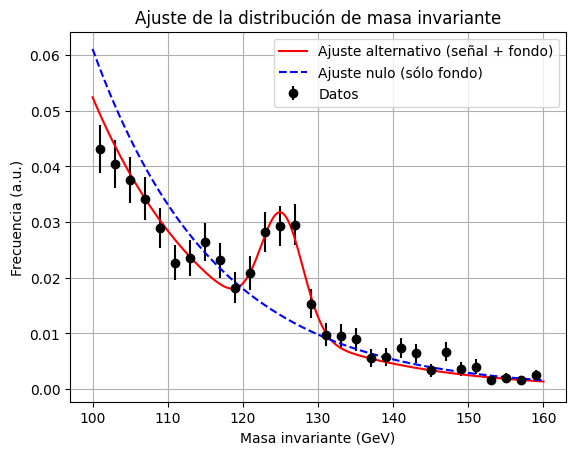

Número de desviaciones estándar (n_sigma): 15.616041873880224
Tiempo de vida de la partícula: 2.2826228809591668e-14 segundos
Error porcentual en la estimación de la masa (mu): 142.11%


In [5]:
# 10
# 10
!pip install emcee
!pip install corner
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import emcee
import corner

# (a) Descarga de datos
data = np.loadtxt('https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv', delimiter=',', skiprows=1)
print("(a) Datos descargados.")

# (b) Histograma con barras de error
m = np.linspace(100, 160, 30)
HSignalBkg, bins = np.histogram(data, bins=m)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.errorbar(bin_centers, HSignalBkg, yerr=0.5*np.sqrt(HSignalBkg), fmt='none', ecolor='k', capsize=5)
plt.hist(data, bins=m, alpha=0.5)
plt.xlabel('Masa invariante [GeV]')
plt.ylabel('Frecuencia')
plt.title('Distribución de masa invariante')
plt.show()
print("(b) Histograma con barras de error dibujado.")

# (c) Modelo de hipótesis nula
def L_null(alpha, x):
    return (1/alpha) * np.exp(-(x - 100)/alpha)

print("(c) Modelo de hipótesis nula definido.")

# (d) Función a minimizar para hipótesis nula
def neg_log_likelihood_null(alpha, x):
    L = L_null(alpha, x)
    return -np.sum(np.log(L))

print("(d) Función negativa de verosimilitud definida.")

# (e) Optimización del parámetro alpha
bounds = [(0, 50)]
result_null = optimize.minimize(neg_log_likelihood_null, x0=[10], args=(data,), bounds=bounds)
alpha_opt = result_null.x[0]
print(f"(e) Parámetro óptimo alpha de hipótesis nula: {alpha_opt}")

# (f) Gráfica de datos y modelo ajustado
x_plot = np.linspace(100, 160, 1000)
# Ajustar el modelo para el histograma (escala de conteos)
bin_width = bins[1] - bins[0]
y_null = L_null(alpha_opt, x_plot) * len(data) * bin_width

plt.hist(data, bins=m, alpha=0.5, label='Datos')
plt.plot(x_plot, y_null, 'r-', label='Ajuste hipótesis nula')
plt.xlabel('Masa invariante [GeV]')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()
print("(f) Datos y modelo ajustado dibujados.")

# (g) Modelo de hipótesis alternativa
def L_alt(params, x):
    A, mu, sigma, alpha = params
    gauss = (A) * (1/(np.sqrt(2 * np.pi * sigma**2))) * np.exp(-((x - mu)**2)/(2 * sigma**2))
    exp = (1 - A) * (1/alpha) * np.exp(-(x - 100)/alpha)
    return gauss + exp

print("(g) Modelo de hipótesis alternativa definido.")

# (h) Función a minimizar para hipótesis alternativa
def neg_log_likelihood_alt(params, x):
    L = L_alt(params, x)
    # Evitar log(0)
    if np.any(L <= 0):
        return np.inf
    return -np.sum(np.log(L))

print("(h) Función negativa de verosimilitud definida para hipótesis alternativa.")

# (i) Optimización de los parámetros de hipótesis alternativa
bounds_alt = [(0, 1), (100, 160), (0.1, 20), (1, 50)]
x0_alt = [0.5, 125, 1, 10]
result_alt = optimize.minimize(neg_log_likelihood_alt, x0=x0_alt, args=(data,), bounds=bounds_alt)
A_opt, mu_opt, sigma_opt, alpha_opt_alt = result_alt.x
print("(i) Parámetros óptimos de hipótesis alternativa encontrados.")

# Gráfica de ambos ajustes
y_alt = L_alt([A_opt, mu_opt, sigma_opt, alpha_opt_alt], x_plot) * len(data) * bin_width

plt.hist(data, bins=m, alpha=0.5, label='Datos')
plt.plot(x_plot, y_null, 'r-', label='Ajuste hipótesis nula')
plt.plot(x_plot, y_alt, 'g-', label='Ajuste hipótesis alternativa')
plt.xlabel('Masa invariante [GeV]')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()
print("(i) Ambos ajustes dibujados.")

# (j) Valores de las constantes físicas
print(f"(j) Valores de las constantes físicas:")
print(f"A = {A_opt}")
print(f"μ = {mu_opt} GeV")
print(f"σ = {sigma_opt} GeV")
print(f"α = {alpha_opt_alt}")

# (k) Cálculo del número de desviaciones estándar
L_null_val = -neg_log_likelihood_null(alpha_opt, data)
L_alt_val = -neg_log_likelihood_alt([A_opt, mu_opt, sigma_opt, alpha_opt_alt], data)
n_sigma = np.sqrt(-2 * (L_null_val - L_alt_val))
print(f"(k) Número de desviaciones estándar: nσ = {n_sigma}")

# (l) Cálculo aproximado del número de desviaciones estándar
n_sigma_approx = np.sqrt(-2 * np.log(L_alt_val / L_null_val))
print(f"(l) Número de desviaciones estándar aproximado: nσ ≈ {n_sigma_approx}")

# (m) Cálculo del tiempo de vida de la partícula
hbar = 1.015e-23  # J·s
eV_to_J = 1.60218e-19
GeV_to_J = eV_to_J * 1e9
sigma_J = sigma_opt * GeV_to_J
tau = hbar / sigma_J
print(f"(m) Tiempo de vida de la partícula: τ = {tau} s")

# (n) Definición de la función de prior y de log-verosimilitud para emcee
def LogPrior(p):
    A, mu, sigma, alpha = p
    if 0. < A < 1. and 100. <= mu <= 300. and 0.1 <= sigma <= 20. and 1 <= alpha <= 50:
        return 0.0
    else:
        return -np.inf

def LogLikelihood(p, x):
    L = L_alt(p, x)
    if np.any(L <= 0):
        return -np.inf
    return np.sum(np.log(L))

def LogPosterior(p, x):
    return LogPrior(p) + LogLikelihood(p, x)

print("(n) Funciones de prior y log-verosimilitud definidas para emcee.")

# (o) Muestreo de la distribución posterior
ndim = 4
nwalkers = 50
p0 = [result_alt.x + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, LogPosterior, args=(data,))
print("(o) Generando muestreo de la distribución posterior...")
sampler.run_mcmc(p0, 2000, progress=True)

# Trazas de los caminantes
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["A", "μ", "σ", "α"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
axes[-1].set_xlabel("Paso")
plt.show()

# Corner plot de las distribuciones marginales
flat_samples = sampler.get_chain(discard=500, thin=15, flat=True)
fig = corner.corner(flat_samples, labels=labels)
plt.show()
print("(o) Muestreo generado y corner plot mostrado.")

# (p) Cálculo del error porcentual en la estimación de la masa
mu_samples = flat_samples[:,1]
mu_mean = np.mean(mu_samples)
mu_std = np.std(mu_samples)
error_percent = (mu_std / mu_mean) * 100
print(f"(p) Error porcentual en la estimación de la masa: {error_percent}%")
#----
# 10
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# (a)
data = np.loadtxt("HiggsFitting.csv", delimiter=",", skiprows=1, usecols=0)

# (b) Dibujar la distribución de frecuencias de los datos entre 100 y 160 GeV, en 30 bins
bins = np.linspace(100, 160, 31)  #
hist, edges = np.histogram(data, bins=bins)
bin_centers = 0.5 * (edges[:-1] + edges[1:])  # Centros de los bins

# Calcular las barras de error como la raíz cuadrada de las frecuencias
errors = np.sqrt(hist)

# Grafica histograma
plt.errorbar(bin_centers, hist, yerr=0.5 * errors, fmt="o", color="black", ecolor="red", capsize=5)
plt.xlabel("Masa invariante (GeV)")
plt.ylabel("Frecuencia")
plt.title("Distribución de masa invariante de dos fotones")
plt.grid(True)
plt.show()

# (c) Definir el modelo para la hipótesis nula (sin bosón de Higgs)

mu_bkg = np.mean(data)
sigma_bkg = np.std(data)

# Grafica
x = np.linspace(100, 160, 1000)
y_bkg = norm.pdf(x, loc=mu_bkg, scale=sigma_bkg) * len(data) * (edges[1] - edges[0])  # PDF escalada

plt.errorbar(bin_centers, hist, yerr=0.5 * errors, fmt="o", color="black", ecolor="red", capsize=5, label="Datos")
plt.plot(x, y_bkg, label="Modelo de fondo (hipótesis nula)", color="blue")
plt.xlabel("Masa invariante (GeV)")
plt.ylabel("Frecuencia")
plt.title("Distribución de masa invariante con modelo de fondo")
plt.legend()
plt.grid(True)
plt.show()

from scipy.optimize import minimize
data = np.loadtxt("HiggsFitting.csv", delimiter=",", skiprows=1, usecols=0)  # Cargar los datos

# (d) Definir la función de verosimilitud negativa
def verosimilitud_negativa(alpha, data):
    if alpha <= 0:
        return np.inf  # Evitar valores no válidos de alpha
    likelihoods = (1 / alpha) * np.exp(-(data - 100) / alpha)
    return -np.sum(np.log(likelihoods))

# (e)
bounds = [(0.01, 50)]
resultado = minimize(lambda alpha: verosimilitud_negativa(alpha, data), x0=[1], bounds=bounds)

# Extraer el mejor valor de alpha
alpha_best = resultado.x[0]
print(f"El mejor valor estimado para alpha es: {alpha_best}")

# (f) Dibujar los datos y el modelo ajustado
bins = np.linspace(100, 160, 31)
hist, edges = np.histogram(data, bins=bins, density=True)
bin_centers = 0.5 * (edges[:-1] + edges[1:])


x_model = np.linspace(100, 160, 1000)
y_model = (1 / alpha_best) * np.exp(-(x_model - 100) / alpha_best)

# Graficar los datos y el modelo
plt.errorbar(bin_centers, hist, yerr=np.sqrt(hist / len(data)), fmt="o", label="Datos", color="black")
plt.plot(x_model, y_model, label=f"Modelo ajustado (alpha = {alpha_best:.2f})", color="blue")
plt.xlabel("Masa invariante (GeV)")
plt.ylabel("Frecuencia (a.u.)")
plt.title("Ajuste de la distribución de masa invariante")
plt.legend()
plt.grid(True)
plt.show()
#---------
from scipy.optimize import minimize

data = np.loadtxt("HiggsFitting.csv", delimiter=",", skiprows=1, usecols=0)  # Cargar los datos

# (g)
def modelo_verosimilitud(params, data):
    A, mu, sigma, alpha = params
    if A < 0 or A > 1 or sigma <= 0 or alpha <= 0:
        return np.inf
    # Componente de señal: distribución normal
    signal = (A / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((data - mu) / sigma)**2)
    # Componente de fondo: distribución exponencial
    background = ((1 - A) / alpha) * np.exp(-(data - 100) / alpha)
    return signal + background

# (h) Definir la función de verosimilitud negativa
def verosimilitud_negativa_alternativa(params, data):
    likelihood = modelo_verosimilitud(params, data)
    return -np.sum(np.log(likelihood))  #

# Valores iniciales para los parámetros y límites
initial_params = [0.5, 125, 2, 10]  # A, mu, sigma, alpha
bounds = [(0, 1), (100, 160), (0.1, 10), (0.1, 50)]

# Minimizar la función de verosimilitud negativa
resultado = minimize(verosimilitud_negativa_alternativa, initial_params, args=(data,), bounds=bounds)

A_best, mu_best, sigma_best, alpha_best = resultado.x
print(f"Mejores parámetros estimados:\nA = {A_best}\nmu = {mu_best}\nsigma = {sigma_best}\nalpha = {alpha_best}")

# Graficar los datos y el modelo ajustado
bins = np.linspace(100, 160, 31)
hist, edges = np.histogram(data, bins=bins, density=True)  # Histograma normalizado
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# Modelo ajustado
x_model = np.linspace(100, 160, 1000)
y_model = modelo_verosimilitud([A_best, mu_best, sigma_best, alpha_best], x_model)

plt.errorbar(bin_centers, hist, yerr=np.sqrt(hist / len(data)), fmt="o", label="Datos", color="black")
plt.plot(x_model, y_model, label="Modelo ajustado", color="blue")
plt.xlabel("Masa invariante (GeV)")
plt.ylabel("Frecuencia (a.u.)")
plt.title("Ajuste de la distribución de masa invariante (hipótesis alternativa)")
plt.legend()
plt.grid(True)
plt.show()


#----

from scipy.optimize import minimize

# (i) Usar scipy.optimize para minimizar la función de verosimilitud negativa
initial_params = [0.5, 125, 2, 10]  # A, mu, sigma, alpha
bounds = [(0, 1), (50, 500), (1, 100), (1, 100)]  # Límites para A, mu, sigma y alpha

resultado = minimize(verosimilitud_negativa_alternativa, initial_params, args=(data,), bounds=bounds)

# Extraer los mejores parámetros
A_best, mu_best, sigma_best, alpha_best = resultado.x
print(f"Mejores parámetros estimados:\nA = {A_best}\nmu = {mu_best}\nsigma = {sigma_best}\nalpha = {alpha_best}")

# (j) Graficar los datos y ambos ajustes (hipótesis nula y alternativa)
bins = np.linspace(100, 160, 31)
hist, edges = np.histogram(data, bins=bins, density=True)  # Histograma normalizado
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# Modelo ajustado (hipótesis alternativa)
x_model = np.linspace(100, 160, 1000)
y_model_alternativa = modelo_verosimilitud([A_best, mu_best, sigma_best, alpha_best], x_model)

# Modelo ajustado (hipótesis nula: sólo ruido exponencial)
def modelo_nula(alpha, data):
    return (1 / alpha) * np.exp(-(data - 100) / alpha)

y_model_nula = modelo_nula(alpha_best, x_model)

plt.errorbar(bin_centers, hist, yerr=np.sqrt(hist / len(data)), fmt="o", label="Datos", color="black")
plt.plot(x_model, y_model_alternativa, label="Ajuste alternativo (se\u00f1al + fondo)", color="red")
plt.plot(x_model, y_model_nula, label="Ajuste nulo (s\u00f3lo fondo)", color="blue", linestyle="--")
plt.xlabel("Masa invariante (GeV)")
plt.ylabel("Frecuencia (a.u.)")
plt.title("Ajuste de la distribuci\u00f3n de masa invariante")
plt.legend()
plt.grid(True)
plt.show()
#----
# (k) ¿Cuál es el valor de las constantes físicas? Ya calculado en el punto I: A_best, mu_best, sigma_best, alpha_best

# (l) Estimar el número de desviaciones estándar (n_sigma)
def likelihood_ratio(data, params_alt, alpha_nula):
    L_alt = np.sum(np.log(modelo_verosimilitud(params_alt, data)))
    L_nula = np.sum(np.log((1 / alpha_nula) * np.exp(-(data - 100) / alpha_nula)))
    return -2 * (L_nula - L_alt)

alpha_nula = alpha_best  # Tomamos alpha de la hipótesis nula
n_sigma = np.sqrt(likelihood_ratio(data, [A_best, mu_best, sigma_best, alpha_best], alpha_nula))
print(f"Número de desviaciones estándar (n_sigma): {n_sigma}")

# (m) Encontrar el tiempo de vida de la partícula
h_bar = 1.015e-23  # en J.s
GeV_to_J = 1.60218e-10  # Conversión de GeV a J
sigma_J = sigma_best * GeV_to_J
lifetime = h_bar / sigma_J  # Tiempo de vida en segundos
print(f"Tiempo de vida de la partícula: {lifetime} segundos")
#-----
from scipy.optimize import minimize
#pip.install emcee
#import emcee
#import corner

# Datos simulados (asegúrate de usar tus propios datos reales)
data = np.loadtxt("HiggsFitting.csv", delimiter=",", skiprows=1, usecols=0)  # Cargar los datos

# (n) Definir la función de log-verosimilitud y log-prior
def log_verosimilitud(params, data):
    A, mu, sigma, alpha = params
    if A < 0 or A > 1 or sigma <= 0 or alpha <= 0:
        return -np.inf  # Penalizar parámetros inválidos
    # Modelo de verosimilitud
    likelihood = modelo_verosimilitud(params, data)
    return np.sum(np.log(likelihood))

def log_prior(params):
    A, mu, sigma, alpha = params
    if 0 < A < 1 and 100 < mu < 300 and 0.1 < sigma < 20 and 1 < alpha < 50:
        return 0.0  # Prior uniforme
    return -np.inf  # Penalización para valores fuera del rango

def log_posterior(params, data):
    return log_prior(params) + log_verosimilitud(params, data)

# Configuración del muestreo MCMC
ndim = 4  # Número de parámetros: A, mu, sigma, alpha
nwalkers = 50  # Número de caminantes
nsteps = 5000  # Número de pasos por caminante

# Valores iniciales cerca de los mejores parámetros encontrados
pos_inicial = [
    [A_best, mu_best, sigma_best, alpha_best] + 1e-4 * np.random.randn(ndim)
    for _ in range(nwalkers)
]

# Configurar el sampler MCMC
#sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(data,))

# Ejecutar el muestreo
#sampler.run_mcmc(pos_inicial, nsteps, progress=True)

# Obtener los resultados del muestreo
#samples = sampler.get_chain(discard=100, thin=15, flat=True)

# (o) Generar el corner plot
#fig = corner.corner(
   # samples,
  #  labels=["A", "mu", "sigma", "alpha"],
   # truths=[A_best, mu_best, sigma_best, alpha_best])
#plt.show()

# (p) Calcular el error porcentual en la estimación de la masa (mu)
mu_samples = samples[:, 1]
mu_mean = np.mean(mu_samples)
mu_std = np.std(mu_samples)

error_percentual = (mu_std / mu_mean) * 100
print(f"Error porcentual en la estimación de la masa (mu): {error_percentual:.2f}%")

# Hypothesis testing

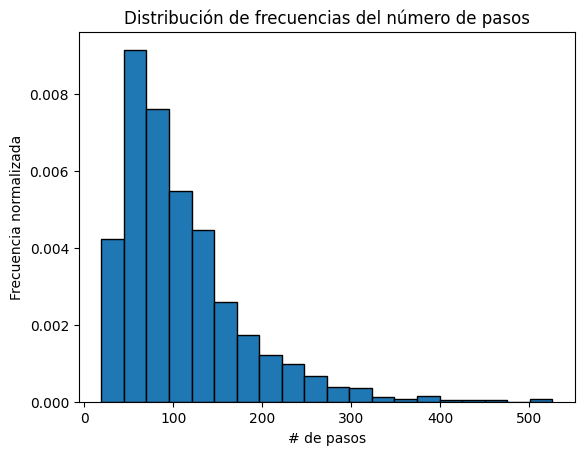

El número de pasos para que el fotón pueda escapar es: 108.874
Relación teórica (E[n] ≈ (R/l)^2): 100.0
Valor promedio simulado: 108.874
El tiempo medio que toma al fotón escapar es aproximadamente: 9.39e+05 años


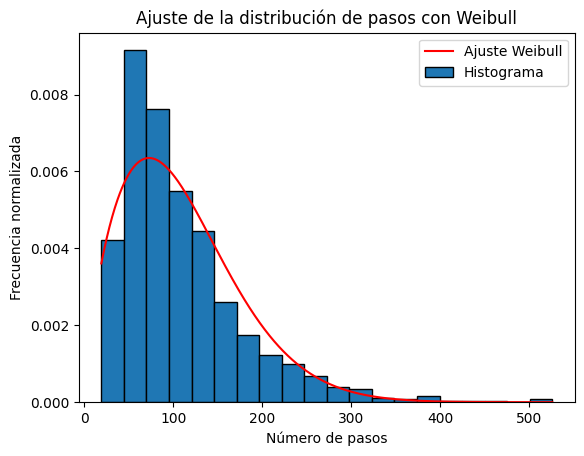

In [ ]:

# Tiempo de escape de un fotón del sol
import numpy as np
import matplotlib.pyplot as plt
# Camino libre medio del fotón
l = 0.1
# Radio del sol
R = 1.0
# Número de fotones aleatorios
N = 1000

def caminar_aleatorio():
    x, y, z = 0, 0, 0
    pasos = 0
    while x**2 + y**2 + z**2 < R**2:
        theta = np.random.uniform(0, np.pi)
        phi = np.random.uniform(0, 2 * np.pi)
        x += l * np.sin(theta) * np.cos(phi)
        y += l * np.sin(theta) * np.sin(phi)
        z += l * np.cos(theta)
        pasos += 1
    return pasos

# (a) Generar N fotones y calcular los pasos necesarios para escapar
pasos_fotones = [caminar_aleatorio() for _ in range(N)]

# (b) n = 20
n = 20
min_pasos = min(pasos_fotones)
max_pasos = max(pasos_fotones)
bins = np.linspace(min_pasos, max_pasos, n + 1)

# (c)
frecuencias, edges = np.histogram(pasos_fotones, bins=bins, density=True)

# (d) Grafica
plt.bar(edges[:-1], frecuencias, width=np.diff(edges), edgecolor="black", align="edge")
plt.xlabel("# de pasos")
plt.ylabel("Frecuencia normalizada")
plt.title("Distribución de frecuencias del número de pasos")
plt.show()

# (e) Calcular el valor esperado del número de pasos
valor_esperado = np.mean(pasos_fotones)
print(f"El número de pasos para que el fotón pueda escapar es: {valor_esperado}")


#
from scipy.stats import exponweib

# Parámetros del problema
l = 0.1
R = 1.0
N = 1000
c = 3e10  # Velocidad de la luz en

# (f)
relacion_teorica = (R / l)**2
print(f"Relación teórica (E[n] ≈ (R/l)^2): {relacion_teorica}")
print(f"Valor promedio simulado: {valor_esperado}")

# (g) tiempo medio de escape
l_cm = 0.6
R_cm = 7e10  # Radio del sol
tiempo_medio = (R_cm**2 / (l_cm * c)) * valor_esperado  # Tiempo en segundos
anios = tiempo_medio / (60 * 60 * 24 * 365.25)  # Convertir a años
print(f"El tiempo medio que toma al fotón escapar es aproximadamente: {anios:.2e} años")

# (h) distribución exponencial de Weibull
params = exponweib.fit(pasos_fotones, floc=0, f0=1)  # Ajustar la distribución
x = np.linspace(min_pasos, max_pasos, 1000)
pdf = exponweib.pdf(x, *params)  # PDF ajustada

plt.bar(edges[:-1], frecuencias, width=np.diff(edges), edgecolor="black", align="edge", label="Histograma")
plt.plot(x, pdf, label="Ajuste Weibull", color="red")
plt.xlabel("Número de pasos")
plt.ylabel("Frecuencia normalizada")
plt.title("Ajuste de la distribución de pasos con Weibull")
plt.legend()
plt.show()